In [ ]:
### Summary of Steps and Improvements
#In this project, I aimed to predict cardiovascular disease risk using the UCI heart disease dataset. 
#Below is an overview of how we tackled various issues and improved our model in multiple iterations:

#1. **Initial Handling of Missing Values:**
   #- I initially removed four columns with the most missing values to ensure a more complete dataset for training.
   #- Later, I revised this approach by filling missing values with the median to retain more information.

#2. **One-Hot Encoding and Feature Selection:**
   #- I applied one-hot encoding to categorical features, such as 'sex', 'thal', and 'slope'. Initially, I dropped the 'id' column and selected key features.
   #- I continuously refined which features were selected to ensure that the model used the most relevant data.

#3. **Normalization of Features:**
   #- Continuous features were normalized to improve model convergence during training.
   #- I used `StandardScaler` to standardize features like 'age', 'cholesterol', and 'thalch'.

#4. **Feature Engineering Attempts:**
     #- I tried several feature engineering strategies:
     #- Removing less important columns to handle missing values.
     #- Filling missing values with the median.
     #- Normalizing features to reduce the influence of outliers.
     #- Finally, I chose to retain most features while filling missing values to preserve as much data as possible.

#5. **Neural Network Model Iterations:**
   #- Initially, I used a simpler neural network model which had fewer units in each layer.
   #- I iterated by adding more layers, units, and batch normalization. This increased the model’s complexity to improve its learning capability.
   #- I added dropout layers to prevent overfitting, which is when a model performs well on training data but poorly on unseen data.

#6. **Random Forest and XGBoost Models:**
   #- I later incorporated two other powerful models: RandomForest and XGBoost.
   #- These models were trained alongside our neural network to understand their performance on the same dataset.

#7. **Model Evaluation and Comparison:**
   #- I evaluated each model using metrics such as accuracy, F1 score, precision, recall, and ROC-AUC.
   #- I compared the three models: Neural Network, RandomForest, and XGBoost.
   #- Feature importance plots were created to understand which features most influenced the RandomForest and XGBoost models.

### Project Steps in Bullet Points
#1. **Import Libraries**: Loaded necessary Python libraries for data handling, model training, visualization, and evaluation.
#2. **Load and Preview Dataset**: Loaded the UCI heart disease dataset and conducted an initial exploration.
#3. **Visualize Missing Data**: Created a heatmap to visualize missing values in the dataset.
#4. **One-Hot Encoding**: Encoded categorical features using one-hot encoding to convert them into numerical data for modeling.
#5. **Feature Selection**: Selected features for the model based on relevance while excluding unnecessary columns like 'id'.
#6. **Normalization**: Applied normalization to continuous features to bring them to the same scale.
#7. **Handle Missing Values**: Dropped columns with the most missing values and filled other missing values with the median.
#8. **Reload Data and Redefine Target**: Reloaded and reprocessed the dataset for consistency, ensuring target and features were correctly defined.
#9. **Split Data**: Divided the data into training and test sets to evaluate model performance effectively.
#10. **Build Neural Network**: Created an improved neural network with dropout and batch normalization to prevent overfitting.
#11. **Train Neural Network**: Trained the model with callbacks for early stopping and learning rate reduction.
#12. **Model Evaluation**: Evaluated the model using accuracy, F1 score, precision, recall, ROC-AUC, and confusion matrix.
#13. **RandomForest and XGBoost Models**: Trained two additional models (RandomForest and XGBoost) to compare their performance with the neural network.
#14. **Compare All Models**: Compared accuracy and F1 scores for all three models.
#15. **Feature Importance Visualization**: Visualized feature importance for RandomForest and XGBoost.


In [1]:
#**Step 1: Import Libraries**

In [415]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
#**Step 2: Load the Dataset**

In [417]:
# Step 2: Load and Preview the Dataset
# Load the dataset
original_data = pd.read_csv('2.Imperial-Predicting Cardiovascular Disease Risk/heart_disease_uci.csv')

# Display the first few rows of the dataset
print("Initial Data Preview:")
print(original_data.head())

Initial Data Preview:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             

In [390]:
#**Step 3: Visualize Missing Data**

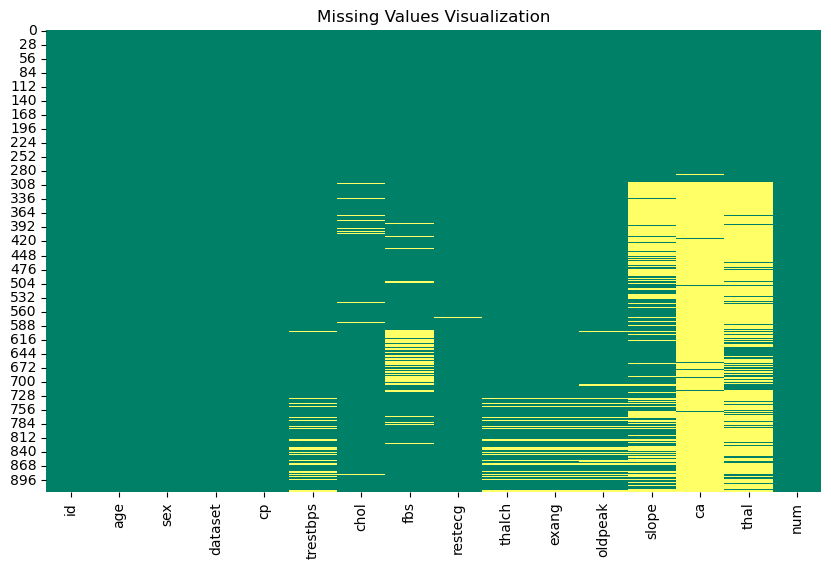

In [419]:
# Step 3: Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(original_data.isnull(), cbar=False, cmap='summer')
plt.title("Missing Values Visualization")
plt.show()

In [421]:
print(data.columns)

Index(['age', 'dataset', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'ca',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect',
       'exang_True', 'num'],
      dtype='object')


In [423]:
# Step 4: Identify Missing Values
missing_data_summary = original_data.isnull().sum()
print("\nMissing Data Summary:\n", missing_data_summary)




Missing Data Summary:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [425]:
# Step 5: One-Hot Encode Categorical Columns
# Apply one-hot encoding to categorical columns
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang']
data_encoded = pd.get_dummies(original_data, columns=categorical_columns, drop_first=True)



In [427]:
# Step 6: Select Relevant Features
# Select the relevant features including encoded columns, excluding 'id'
features = [
    'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_Male',
    'thal_normal', 'thal_reversable defect', 'slope_flat',
    'slope_upsloping', 'exang_True'
]
data = data_encoded[features]
print("\nData After Feature Selection:")
print(data.head())


Data After Feature Selection:
   age  trestbps   chol  thalch  oldpeak   ca  sex_Male  thal_normal  \
0   63     145.0  233.0   150.0      2.3  0.0      True        False   
1   67     160.0  286.0   108.0      1.5  3.0      True         True   
2   67     120.0  229.0   129.0      2.6  2.0      True        False   
3   37     130.0  250.0   187.0      3.5  0.0      True         True   
4   41     130.0  204.0   172.0      1.4  0.0     False         True   

   thal_reversable defect  slope_flat  slope_upsloping  exang_True  
0                   False       False            False       False  
1                   False        True            False        True  
2                    True        True            False        True  
3                   False       False            False       False  
4                   False       False             True       False  


In [433]:
# Step 7: Normalize Continuous Features
# Select continuous features for normalization that exist in the DataFrame
continuous_features = [col for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'] if col in data.columns]

# Ensure selected columns are of float type and normalize using StandardScaler
scaler = StandardScaler()
data.loc[:, continuous_features] = scaler.fit_transform(data[continuous_features].astype(float))

print("\nData After Normalization:")
print(data.head())



Data After Normalization:
        age  trestbps      chol    thalch   oldpeak        ca  sex_Male  \
0  1.007386  0.675287  0.305908  0.480653  1.303159 -0.724064      True   
1  1.432034  1.462483  0.784599 -1.140262  0.569611  2.487454      True   
2  1.432034 -0.636705  0.269780 -0.329805  1.578239  1.416948      True   
3 -1.752828 -0.111908  0.459450  1.908602  2.403480 -0.724064      True   
4 -1.328180 -0.111908  0.043982  1.329704  0.477918 -0.724064     False   

   thal_normal  thal_reversable defect  slope_flat  slope_upsloping  \
0        False                   False       False            False   
1         True                   False        True            False   
2        False                    True        True            False   
3         True                   False       False            False   
4         True                   False       False             True   

   exang_True  
0       False  
1        True  
2        True  
3       False  
4       False  

In [435]:
# Step 8: Handle Missing Values (Part 1)
# Show missing value count for each column
missing_data_summary = data.isnull().sum()
print("\nMissing Data Summary After Normalization:\n", missing_data_summary)




Missing Data Summary After Normalization:
 age                         0
trestbps                   59
chol                       30
thalch                     55
oldpeak                    62
ca                        611
sex_Male                    0
thal_normal                 0
thal_reversable defect      0
slope_flat                  0
slope_upsloping             0
exang_True                  0
dtype: int64


In [437]:
# Step 8: Handle Missing Values (Revised)
# Fill all missing values with median for numerical columns
data = data.fillna(data.median())

print("\nData After Handling Missing Values (Revised):")
print(data.head())





Data After Handling Missing Values (Revised):
        age  trestbps      chol    thalch   oldpeak        ca  sex_Male  \
0  1.007386  0.675287  0.305908  0.480653  1.303159 -0.724064      True   
1  1.432034  1.462483  0.784599 -1.140262  0.569611  2.487454      True   
2  1.432034 -0.636705  0.269780 -0.329805  1.578239  1.416948      True   
3 -1.752828 -0.111908  0.459450  1.908602  2.403480 -0.724064      True   
4 -1.328180 -0.111908  0.043982  1.329704  0.477918 -0.724064     False   

   thal_normal  thal_reversable defect  slope_flat  slope_upsloping  \
0        False                   False       False            False   
1         True                   False        True            False   
2        False                    True        True            False   
3         True                   False       False            False   
4         True                   False       False             True   

   exang_True  
0       False  
1        True  
2        True  
3       Fal

In [439]:
# Step 9: Reload Data and Define Target (Updated)
# Reload dataset and prepare the same feature and target as before
data = pd.read_csv('2.Imperial-Predicting Cardiovascular Disease Risk/heart_disease_uci.csv')

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define target and feature columns
if 'num' in data_encoded.columns:
    target = 'num'
    features = [col for col in data_encoded.columns if col != target and col != 'id']  # Exclude 'id'
    data = data_encoded[features + [target]]
else:
    raise KeyError("Target column 'num' not found in data.")

print("\nData Reloaded and Target Defined (Revised):")
print(data.head())




Data Reloaded and Target Defined (Revised):
   age    dataset  trestbps   chol    fbs  thalch  oldpeak   ca  sex_Male  \
0   63  Cleveland     145.0  233.0   True   150.0      2.3  0.0      True   
1   67  Cleveland     160.0  286.0  False   108.0      1.5  3.0      True   
2   67  Cleveland     120.0  229.0  False   129.0      2.6  2.0      True   
3   37  Cleveland     130.0  250.0  False   187.0      3.5  0.0      True   
4   41  Cleveland     130.0  204.0  False   172.0      1.4  0.0     False   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  slope_

In [441]:
# Step 10: Separate Features and Target
# Define the target variable
target = 'num'

if target in data.columns:
    features = [col for col in data.columns if col != target]
    X = data[features]
    y = data[target]
else:
    print("Error: Target column 'num' not found in data.")
    raise KeyError("Target column 'num' not found in data.")

# Convert all features to numeric, ensuring no non-numeric values remain
X = pd.get_dummies(X, drop_first=True)

# Ensure all features are numeric after one-hot encoding
X = X.apply(pd.to_numeric, errors='coerce')

# Fill any potential NaN values resulting from conversion
X.fillna(0, inplace=True)



In [443]:
# Step 10.1: Check for Non-Numerical Values
# Count the number of non-numerical cells after Step 10
non_numerical_cells_count = X.select_dtypes(include=['object']).stack().count()
print(f"\nNumber of Non-Numerical Cells: {non_numerical_cells_count}")

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print("\nRemaining Categorical Columns:", categorical_columns)


Number of Non-Numerical Cells: 0

Remaining Categorical Columns: Index([], dtype='object')


In [445]:
# Step 11: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Testing Data Split Completed")


Training and Testing Data Split Completed


In [447]:
# Step 12: Update Neural Network Model for Multi-Class Classification (Revised)
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))  # Reduce number of units to prevent overfitting
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Multi-class classification

# Compile the model with appropriate loss function for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nModel Updated and Compiled for Multi-Class Classification (Revised)")


Model Updated and Compiled for Multi-Class Classification (Revised)


In [453]:
# Step 13: Train the Model without Class Weights to Avoid Key Error
# Callbacks for early stopping and learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
print("\nModel Training Completed")

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3663 - loss: 1.6756 - val_accuracy: 0.4620 - val_loss: 1.9827 - learning_rate: 0.0010
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.4718 - loss: 1.3482 - val_accuracy: 0.4565 - val_loss: 1.5544 - learning_rate: 0.0010
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4636 - loss: 1.2485 - val_accuracy: 0.4239 - val_loss: 1.3696 - learning_rate: 0.0010
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.4721 - loss: 1.2427 - val_accuracy: 0.4457 - val_loss: 1.2764 - learning_rate: 0.0010
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4664 - loss: 1.2555 - val_accuracy: 0.4457 - val_loss: 1.2981 - learning_rate: 0.0010
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5559 - loss: 1.1165 - val_accuracy: 0.4402 - val_loss: 1.3049 - learning_rate: 0.0010
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5438 - loss: 1.13

In [455]:
# Step 14: Evaluate the Model
# Evaluate the model on the test data
eval_results = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5838 - loss: 0.9884

Test Loss: 1.0057789087295532, Test Accuracy: 0.570652186870575


In [457]:
# Step 15: Make Predictions
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the class with highest probability

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


In [459]:
# Step 16: Model Evaluation Metrics
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # Use multi_class='ovr' for ROC AUC

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")




Model Evaluation Metrics:
Accuracy: 0.5706521739130435
Precision: 0.5403038786999848
Recall: 0.5706521739130435
F1 Score: 0.537552142040786
ROC AUC Score: 0.8085471620018657



Confusion Matrix:
[[68  5  2  0  0]
 [21 24  4  5  0]
 [ 4 10  2  9  0]
 [ 3 12  2  9  0]
 [ 0  1  0  3  0]]


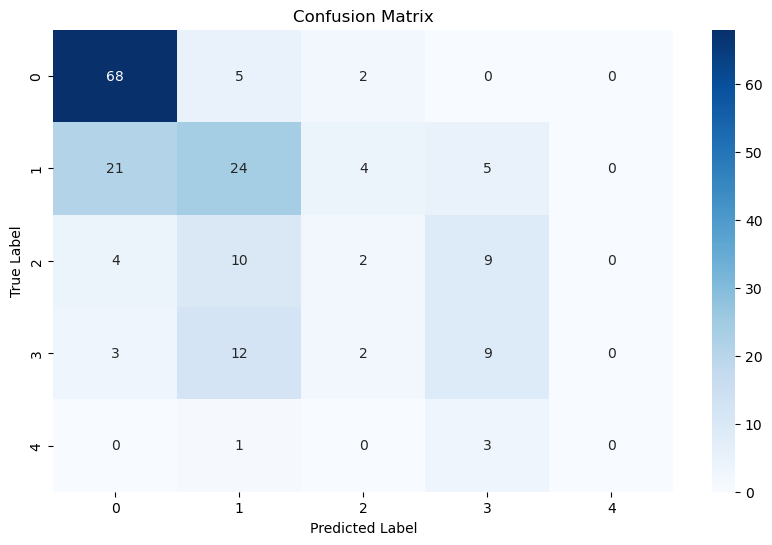

In [343]:
# Step 17: Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

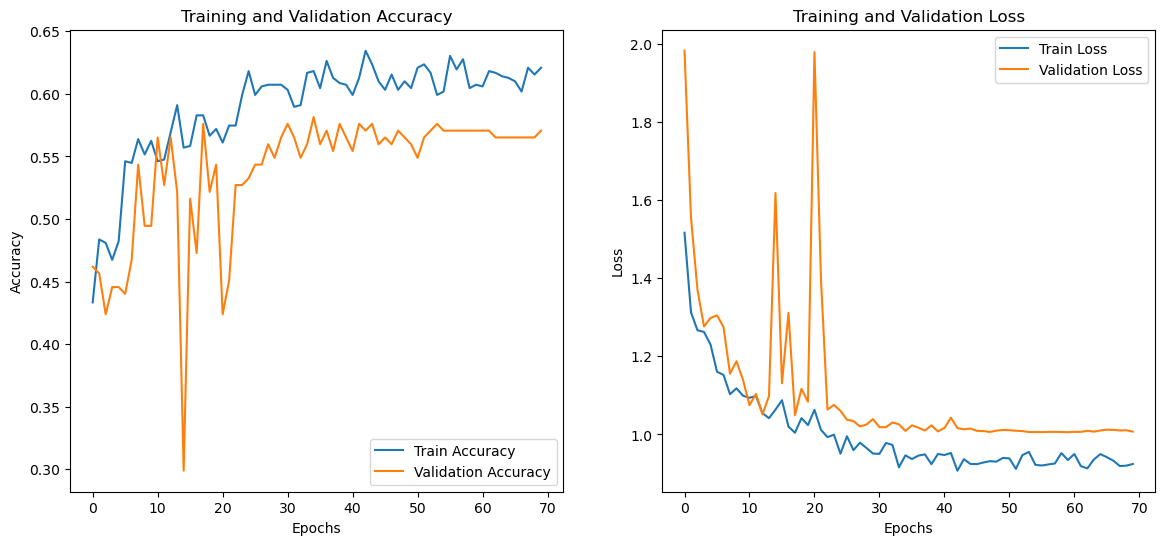

In [461]:
# Step 19: Training History Visualization
# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [463]:
# Step 20: Random Forest and XGBoost Models
# Initialize RandomForestClassifier and XGBClassifier
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train RandomForest and XGBoost models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the test set for both models
rf_y_pred = rf_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:58:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



RandomForest Accuracy: 0.5652173913043478
RandomForest F1 Score: 0.5259709336487421
XGBoost Accuracy: 0.5652173913043478
XGBoost F1 Score: 0.5332900689637292
Neural Network Accuracy: 0.5706521739130435
Neural Network F1 Score: 0.537552142040786


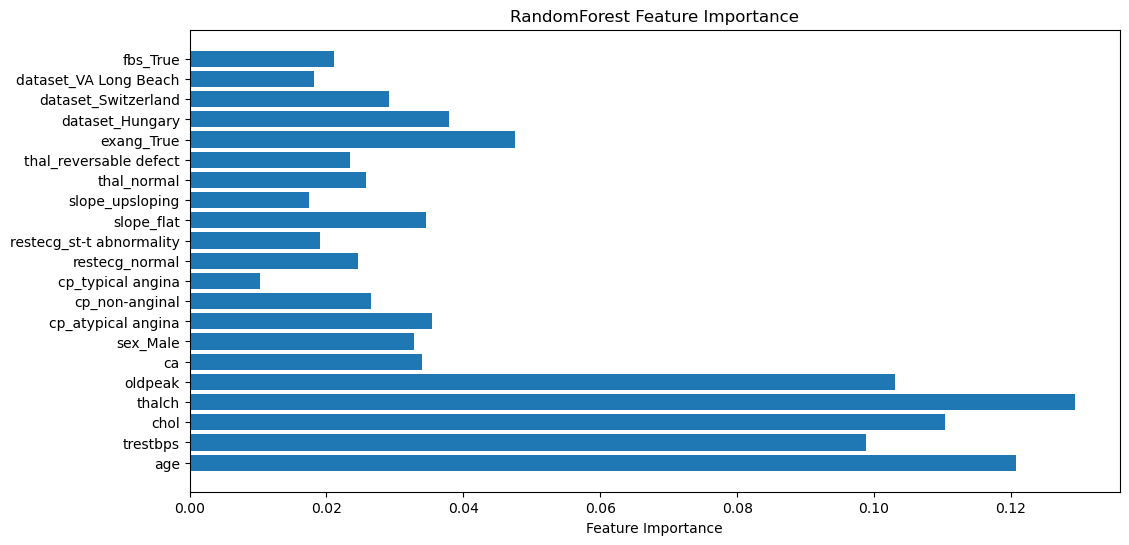

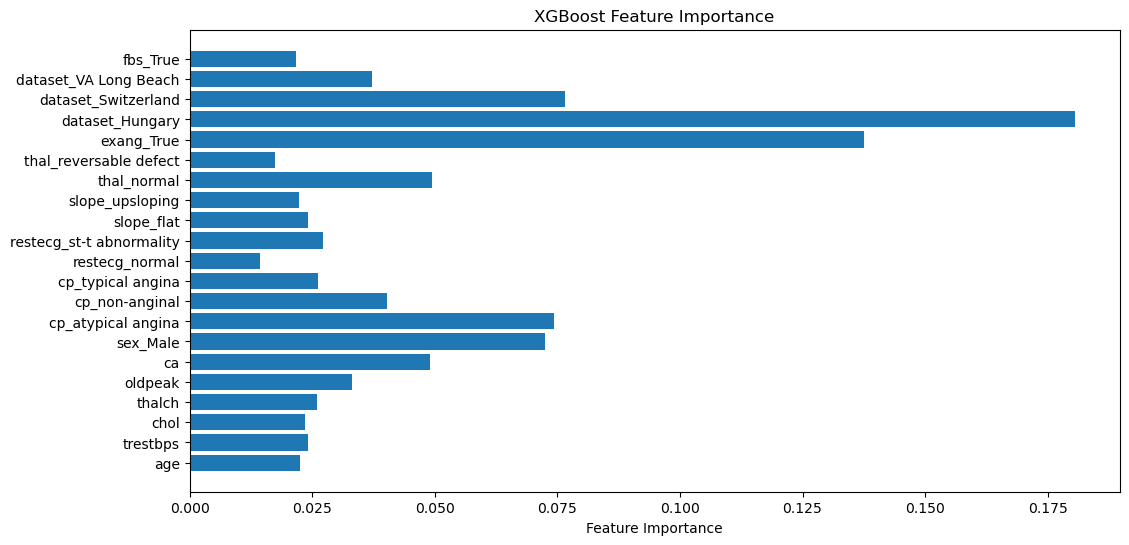

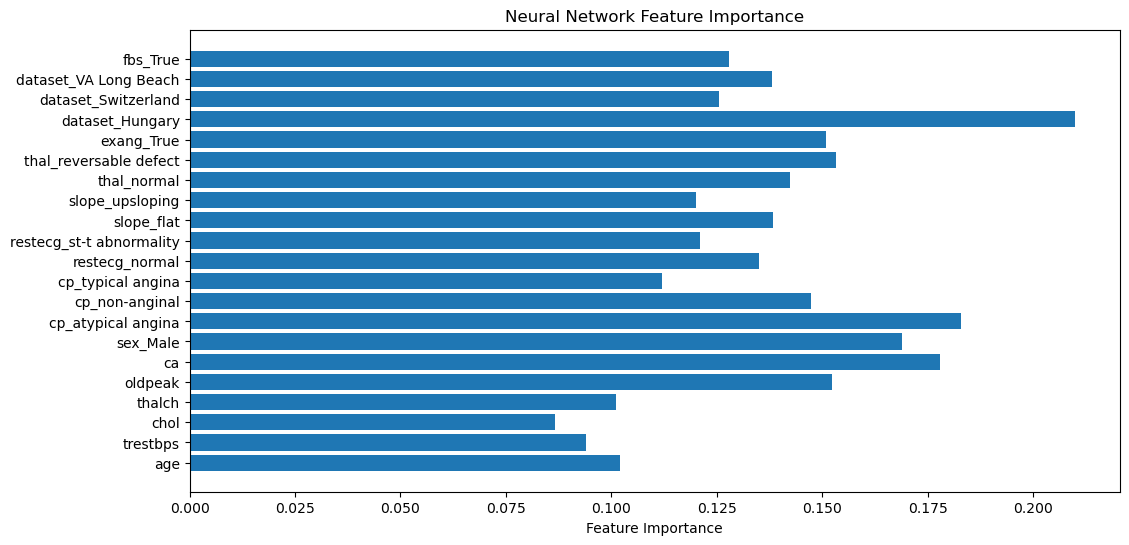

In [473]:
# Step 21: Model Comparison
# Calculate evaluation metrics for RandomForest and XGBoost
rf_accuracy = accuracy_score(y_test, rf_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
nn_accuracy = accuracy_score(y_test, y_pred)

rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_y_pred, average='weighted')
nn_f1 = f1_score(y_test, y_pred, average='weighted')

print("\nRandomForest Accuracy:", rf_accuracy)
print("RandomForest F1 Score:", rf_f1)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost F1 Score:", xgb_f1)
print("Neural Network Accuracy:", nn_accuracy)
print("Neural Network F1 Score:", nn_f1)

# Plot feature importance for RandomForest
plt.figure(figsize=(12, 6))
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('RandomForest Feature Importance')
plt.show()

# Plot feature importance for XGBoost
plt.figure(figsize=(12, 6))
plt.barh(X_train.columns, xgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

# Plot feature importance for Neural Network (using weights visualization)
plt.figure(figsize=(12, 6))
weights = model.get_weights()[0]
mean_weights = np.mean(np.abs(weights), axis=1)
plt.barh(X_train.columns, mean_weights)
plt.xlabel('Feature Importance')
plt.title('Neural Network Feature Importance')
plt.show()

In [471]:
# Step 22: Final Model Comparison with Neural Network
# Include Neural Network, RandomForest, and XGBoost metrics for comparison
print("\nFinal Model Comparison:")
print("Neural Network Accuracy:", accuracy)
print("Neural Network F1 Score:", f1)
print("RandomForest Accuracy:", rf_accuracy)
print("RandomForest F1 Score:", rf_f1)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost F1 Score:", xgb_f1)


Final Model Comparison:
Neural Network Accuracy: 0.5706521739130435
Neural Network F1 Score: 0.537552142040786
RandomForest Accuracy: 0.5652173913043478
RandomForest F1 Score: 0.5259709336487421
XGBoost Accuracy: 0.5652173913043478
XGBoost F1 Score: 0.5332900689637292
